In [1]:
from PIL import Image
import pandas as pd 
import os
import numpy as np 
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid import ImageGrid
from sklearn.model_selection import train_test_split
# local module import
from preprocessing import load_dataset

<ipython-input-1-06893ce29789>:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import ImageGrid


In [2]:
# Path to all data
DATA_PATH = "../dataset_mri/lgg-mri-segmentation/kaggle_3m/"
IMG_SIZE=224
dataset=load_dataset(DATA_PATH)
dataset.head()

,patient_id,image_path,image_data,mask_path,mask_data,tumor
0,TCGA_CS_4941_19960909_1,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,TCGA_CS_4941_19960909_10,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,TCGA_CS_4941_19960909_11,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[1, 1, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 2, 3, 5,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,TCGA_CS_4941_19960909_12,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[4, 2, 2, 4, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2, 3,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,TCGA_CS_4941_19960909_13,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[3, 1, 2, 3, 2, 3, 4, 5, 6, 5, 3, 2, 2, 2, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


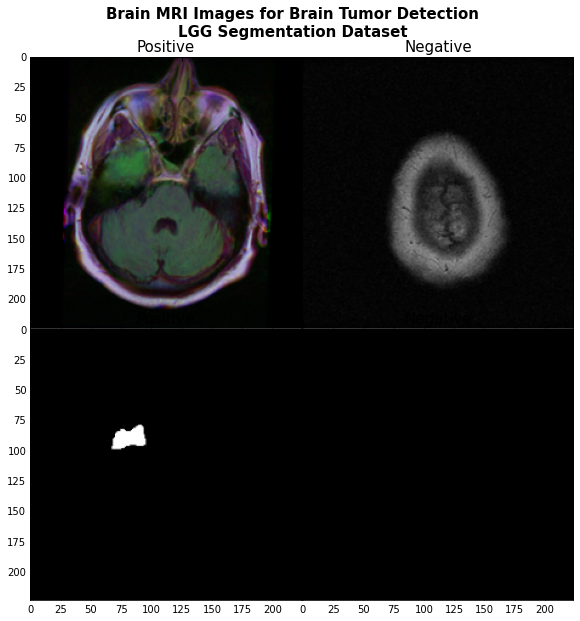

In [4]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(2)
sample_no_df = dataset[dataset["tumor"] == 0].sample(2)
image_yes = sample_yes_df.image_path.values
image_no= sample_no_df.image_path.values
mask_yes = sample_yes_df.mask_path.values
mask_no= sample_no_df.mask_path.values

sample_imgs = []
for i, (yes, no,yes_mask,no_mask) in enumerate(zip(image_yes, image_no, mask_yes, mask_no)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    yes_mask= cv2.resize(cv2.imread(yes_mask), (IMG_SIZE, IMG_SIZE))
    no_mask= cv2.resize(cv2.imread(no_mask), (IMG_SIZE, IMG_SIZE))

# Plot
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2))

#MR Images
grid[0].imshow(yes)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(no)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")
#Mask corresponding
grid[2].imshow(yes_mask)
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(no_mask)
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")
# annotations
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=15, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()

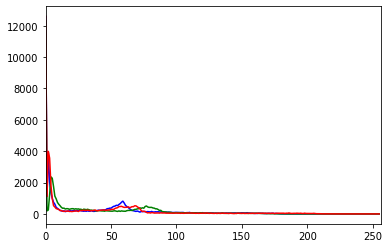

In [7]:
def calculhisto(I,color):
    for i,col in enumerate(color):
        histr = cv2.calcHist([I],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
    
    
hist = calculhisto(yes,('b','g','r'))

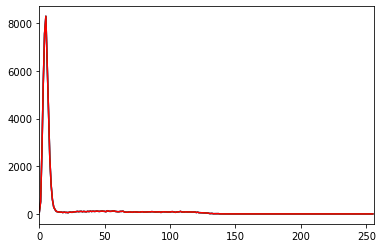

In [8]:
hist = calculhisto(no,('b','g','r'))

In [17]:
img = cv2.imread("../dataset_mri/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif")

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

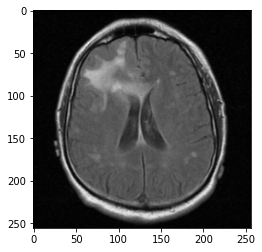

In [19]:
plt.imshow(gray, cmap='gray')

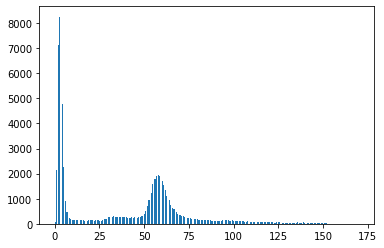

In [20]:
plt.hist(gray.ravel(),256)
plt.show()

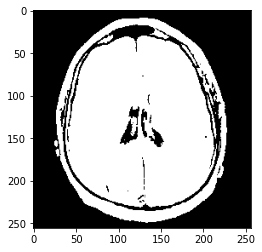

In [21]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

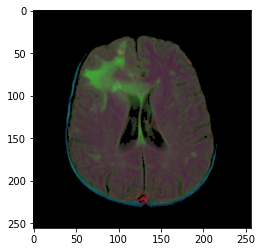

In [25]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
plt.imshow(brain_out)

(-0.5, 255.5, 255.5, -0.5)

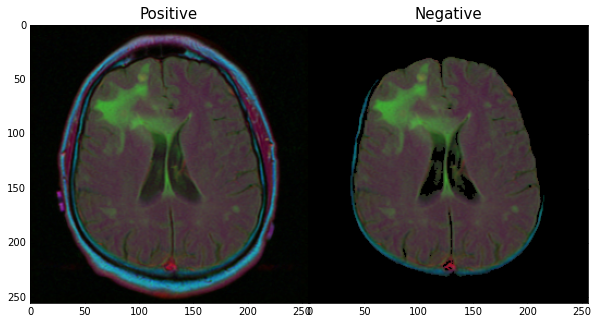

In [26]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

#MR Images
grid[0].imshow(img)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(brain_out)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")